### business objective:-
                        The aim of this analysis is to help the from identify those customers who have alower probability of become a defulter.

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib as mat 
import seaborn as sns

In [2]:
df_dictionary=pd.read_csv('DS1_C5_S4_Data_Dictionary_Credit_Data.csv')
df_dictionary

,index,Row,Description
0,1,SK_ID_CURR,ID of loan in our sample
1,2,TARGET,Target variable (1 - client with payment diffi...
2,3,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,4,GENDER,Gender of the client
4,5,Car,Flag if the client owns a car
5,6,House,Flag if client owns a house or flat
6,7,CNT_CHILDREN,Number of children the client has
7,8,AMT_INCOME_TOTAL,Income of the client
8,9,AMT_CREDIT,Credit amount of the loan
9,10,AMT_GOODS_PRICE,For consumer loans it is the price of the good...


### level 0 analysis

In [3]:
df= pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')

In [4]:
df.head()# show first five columns.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [5]:
df.tail()# show last five columns

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [7]:
df.shape

(100000, 24)

In [8]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

# Level 1 analysis

In [10]:
def seprete_data_types(df):
    categorical=[]
    continuous=[]
    for i in df.columns:
        if df[i].nunique()>30:
            continuous.append(i)
        else:
            categorical.append(i)
    return categorical,continuous
categorical,continuous=seprete_data_types(df)
table=["categorical","continuous"]
print(tabulate({"categorical":categorical,"continuous":continuous},headers=["categorical","continuous"]))


categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [11]:
def info_of_cat(col):
    print(f"unique number of {col} are : {df[col].unique()}")
    print(f" mode value of {col} is : {df[col].mode()[0]}")
    print(f" the number of missing {col} is: {df[col].isnull().sum()}")
    

In [12]:
info_of_cat('NAME_TYPE_SUITE')

unique number of NAME_TYPE_SUITE are : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
 mode value of NAME_TYPE_SUITE is : Unaccompanied
 the number of missing NAME_TYPE_SUITE is: 405


In [13]:
a=df['NAME_TYPE_SUITE'].mode()[0]

In [14]:
a

'Unaccompanied'

In [15]:
df['NAME_TYPE_SUITE'].fillna(a,inplace=True)
info_of_cat('NAME_TYPE_SUITE')

unique number of NAME_TYPE_SUITE are : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
 mode value of NAME_TYPE_SUITE is : Unaccompanied
 the number of missing NAME_TYPE_SUITE is: 0


In [16]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [17]:
info_of_cat('OCCUPATION_TYPE')

unique number of OCCUPATION_TYPE are : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
 mode value of OCCUPATION_TYPE is : Laborers
 the number of missing OCCUPATION_TYPE is: 31224


In [18]:
 mode=df['OCCUPATION_TYPE'].mode()[0]
df['OCCUPATION_TYPE'].fillna(mode,inplace=True)

In [19]:
info_of_cat('CNT_FAM_MEMBERS')

unique number of CNT_FAM_MEMBERS are : [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
 mode value of CNT_FAM_MEMBERS is : 2.0
 the number of missing CNT_FAM_MEMBERS is: 1


In [20]:
mode=df['CNT_FAM_MEMBERS'].mode()[0]
df['CNT_FAM_MEMBERS'].fillna(mode,inplace=True)

In [21]:
def info_of_numerical(col):
    print(f" mean value of {col} is : {df[col].mean()}")
    print(f" median value of {col} is : {df[col].median()}")
    print(f" mode value of {col} is : {df[col].mode()[0]}")
    print(f" standerd version of {col} is: {df[col].std()}")
    print(f" the number of missing {col} is : {df[col].isnull().sum()}")

In [22]:
info_of_numerical('AMT_GOODS_PRICE')

 mean value of AMT_GOODS_PRICE is : 538345.1489706662
 median value of AMT_GOODS_PRICE is : 450000.0
 mode value of AMT_GOODS_PRICE is : 450000.0
 standerd version of AMT_GOODS_PRICE is: 369397.7246421765
 the number of missing AMT_GOODS_PRICE is : 81


In [23]:
df['AMT_GOODS_PRICE'].mean()

538345.1489706662

In [24]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace=True)

In [25]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

### Level 2 analysis

In [26]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

In [27]:
df.nunique()

SK_ID_CURR             100000
TARGET                      2
NAME_CONTRACT_TYPE          2
GENDER                      3
Car                         2
House                       2
CNT_CHILDREN               12
AMT_INCOME_TOTAL         1212
AMT_CREDIT               4162
AMT_GOODS_PRICE           624
NAME_TYPE_SUITE             7
NAME_INCOME_TYPE            8
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          6
DAYS_EMPLOYED            9871
MOBILE                      2
WORK_PHONE                  2
HOME_PHONE                  2
MOBILE_REACHABLE            2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            12
APPLICATION_DAY             7
TOTAL_DOC_SUBMITTED         5
dtype: int64

In [28]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

## level 1 (𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝐶𝑎𝑡𝑒𝑔𝑜𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠)

In [29]:
df['GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [30]:
df['TARGET'].unique()

array([1, 0], dtype=int64)

In [31]:
df.drop(df[df['GENDER']=='XNA'].index, inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


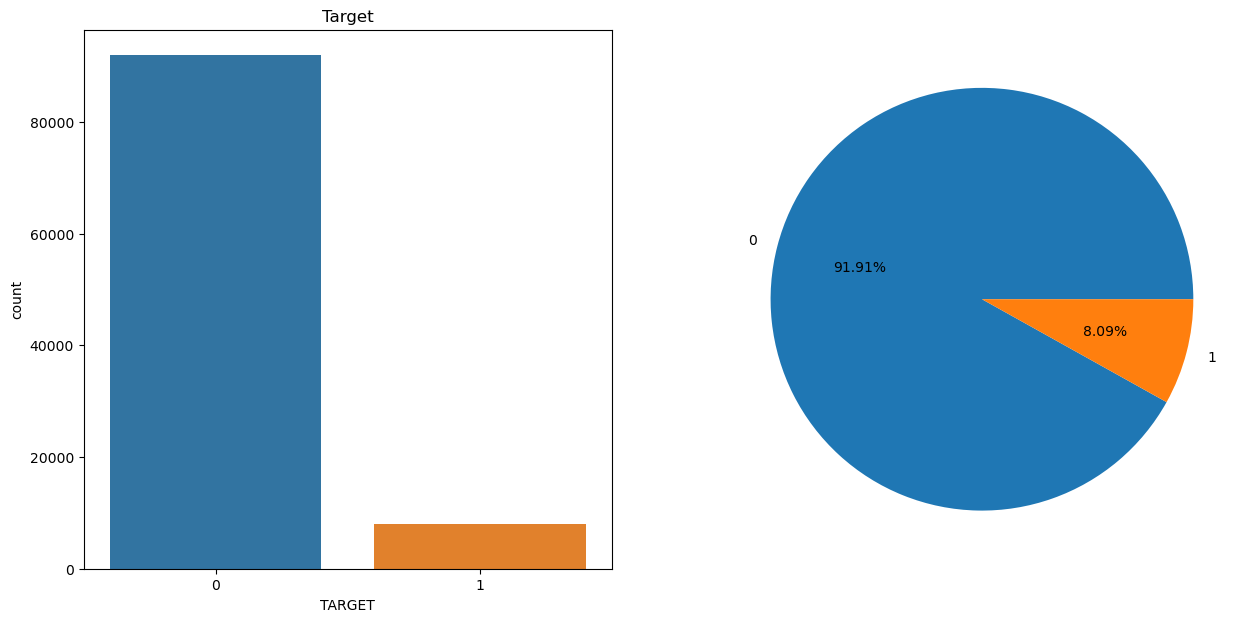

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Target')
percentage=df['TARGET'].value_counts()
labels=list(df['TARGET'].value_counts().index)
sns.countplot(x=df['TARGET'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## Interpretation:-The number of people with no reduction in payment associated is higher than the number of people facing consumers.

In [33]:
df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

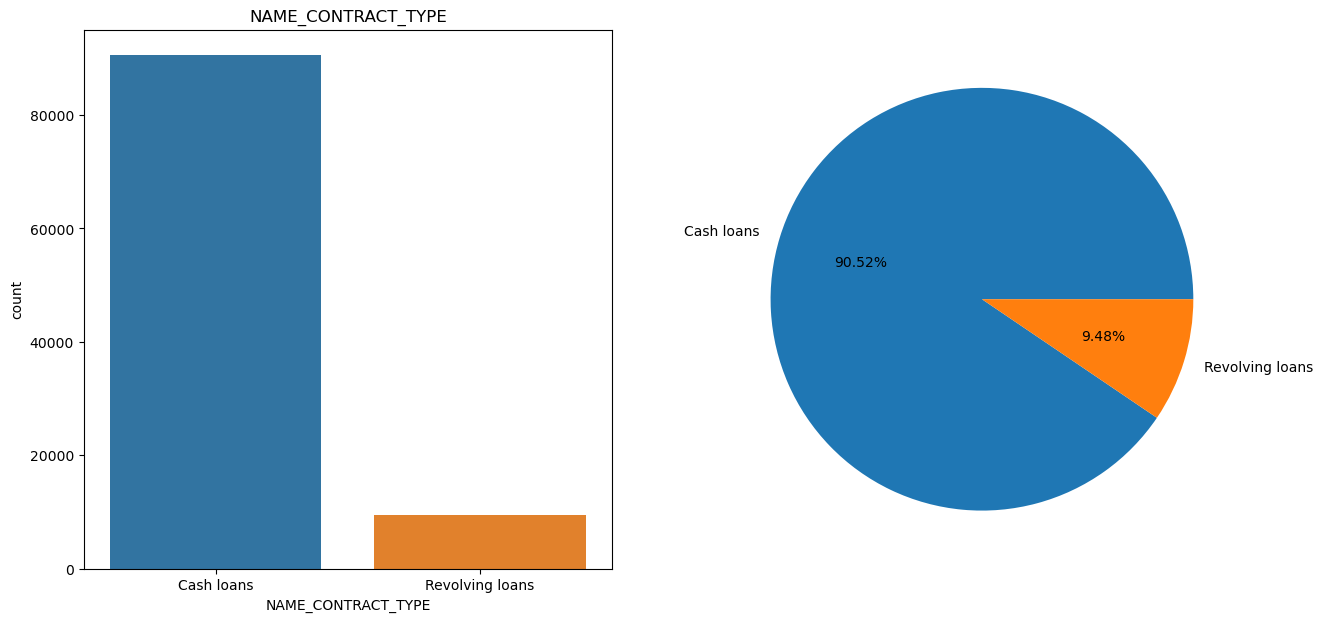

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('NAME_CONTRACT_TYPE')
percentage=df['NAME_CONTRACT_TYPE'].value_counts()
labels=list(df['NAME_CONTRACT_TYPE'].value_counts().index)
sns.countplot(x=df['NAME_CONTRACT_TYPE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## interpretation:-Majority of loans in the dataset fall under the ‘case loans’ category which adds up to 90% balance with revolving loans.

In [34]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

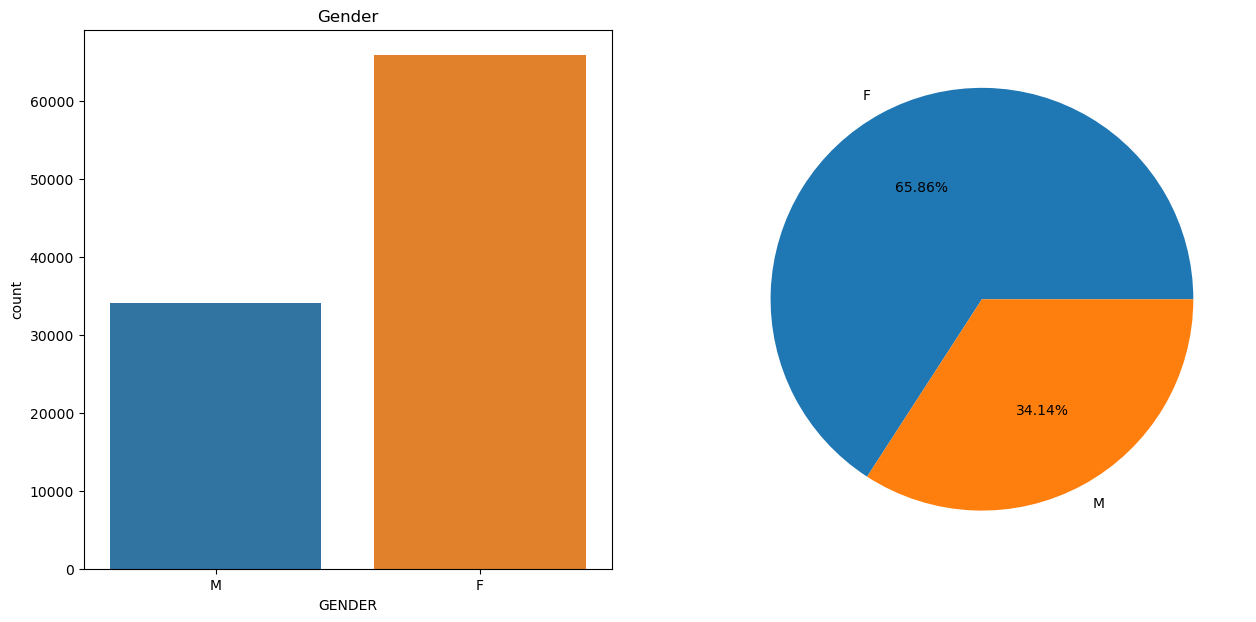

In [35]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Gender')
percentage=df['GENDER'].value_counts()
labels=list(df['GENDER'].value_counts().index)
sns.countplot(x=df['GENDER'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## Interpretation:-Females constitute a large proportion compared to male which is 65%.

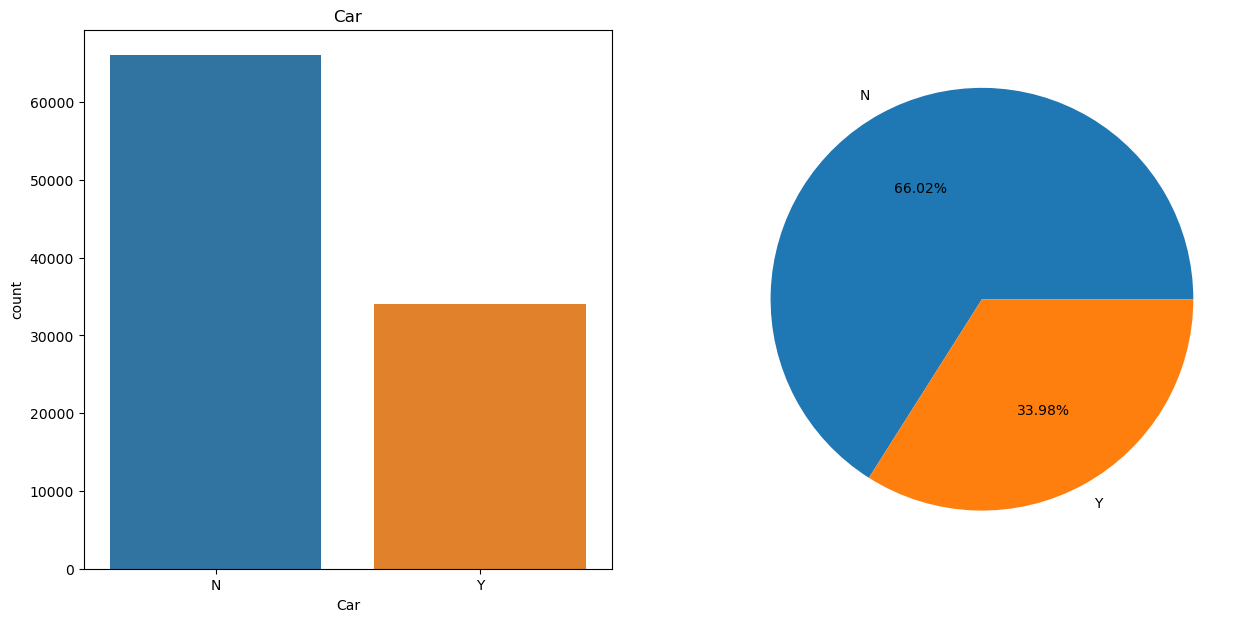

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Car')
percentage=df['Car'].value_counts()
labels=list(df['Car'].value_counts().index)
sns.countplot(x=df['Car'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## Interpretation:- Majority 66% of the people are not owning a car only 34% of the total people are owning a car.

In [37]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

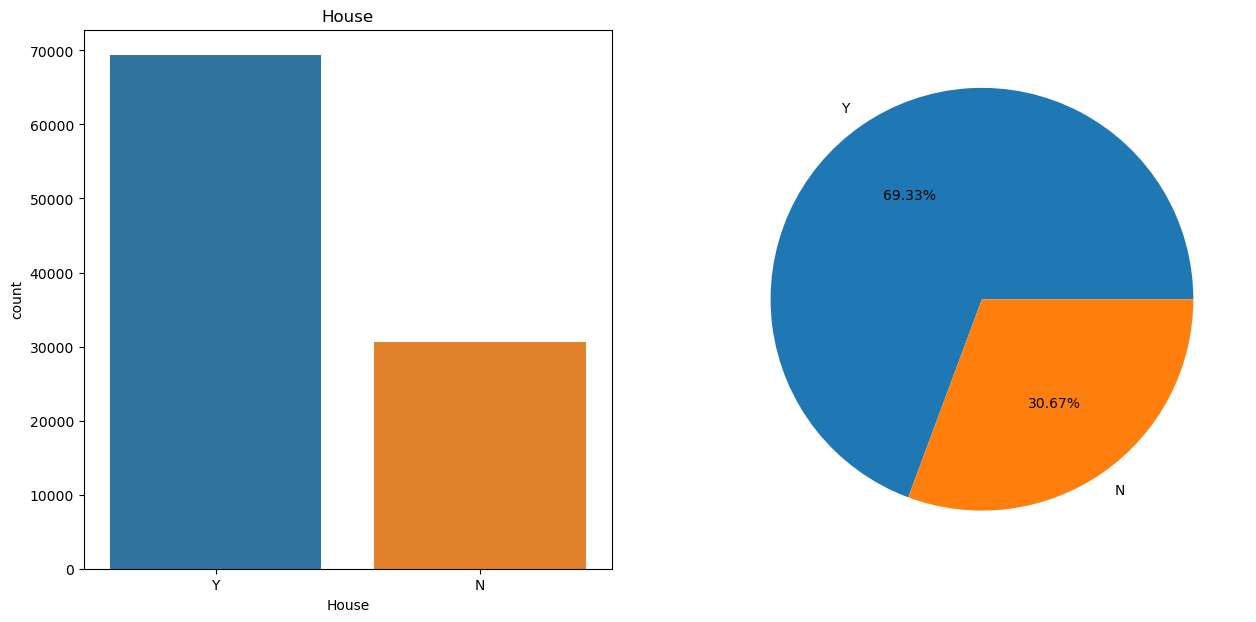

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('House')
percentage=df['House'].value_counts()
labels=list(df['House'].value_counts().index)
sns.countplot(x=df['House'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-69% of the people are owning the house and 30% not owning house .

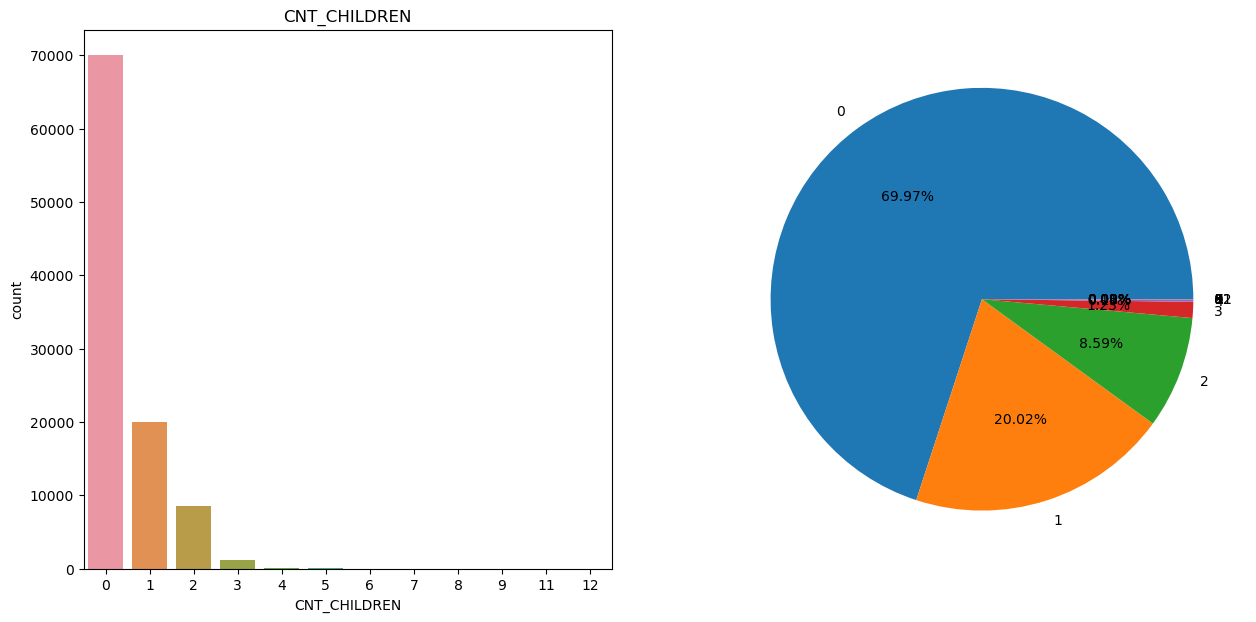

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('CNT_CHILDREN')
percentage=df['CNT_CHILDREN'].value_counts()
labels=list(df['CNT_CHILDREN'].value_counts().index)
sns.countplot(x=df['CNT_CHILDREN'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## interpretation:-This indicates that the majority of people are individuals who do not have children or are families where the number of children is 0, followed by a few who have one child..

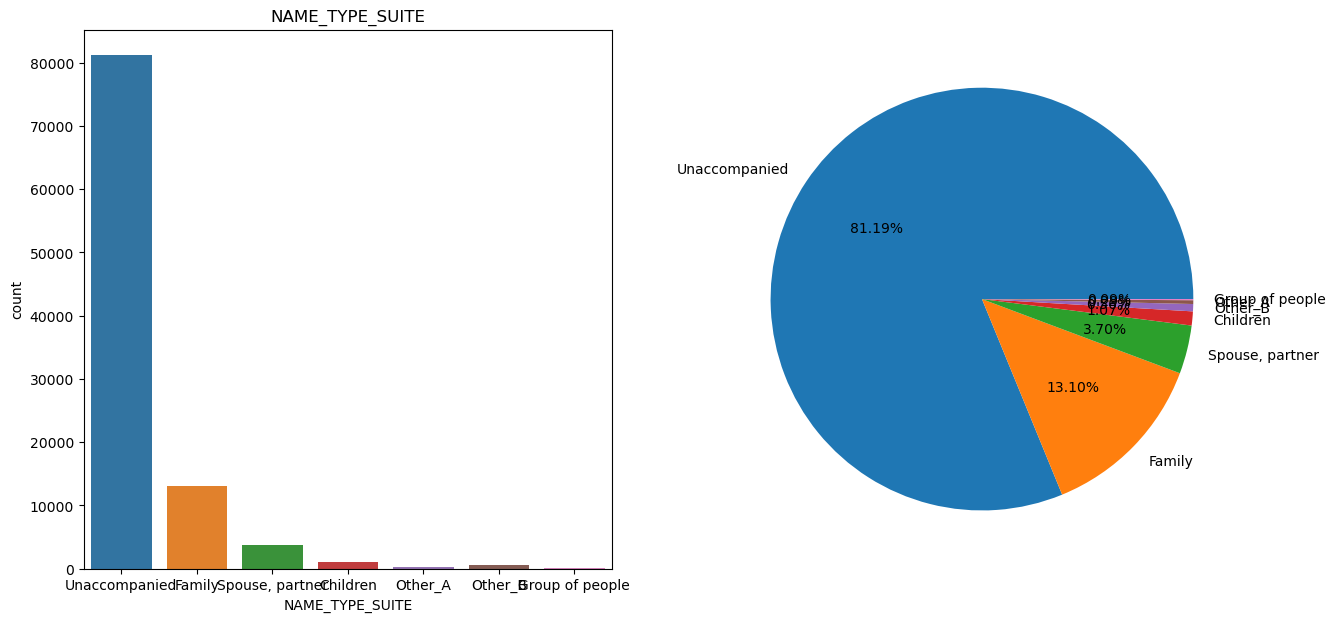

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('NAME_TYPE_SUITE')
percentage=df['NAME_TYPE_SUITE'].value_counts()
labels=list(df['NAME_TYPE_SUITE'].value_counts().index)
sns.countplot(x=df['NAME_TYPE_SUITE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### The majority of people in the bank are unaccompanied, which is 81%, followed by 21% who have family.


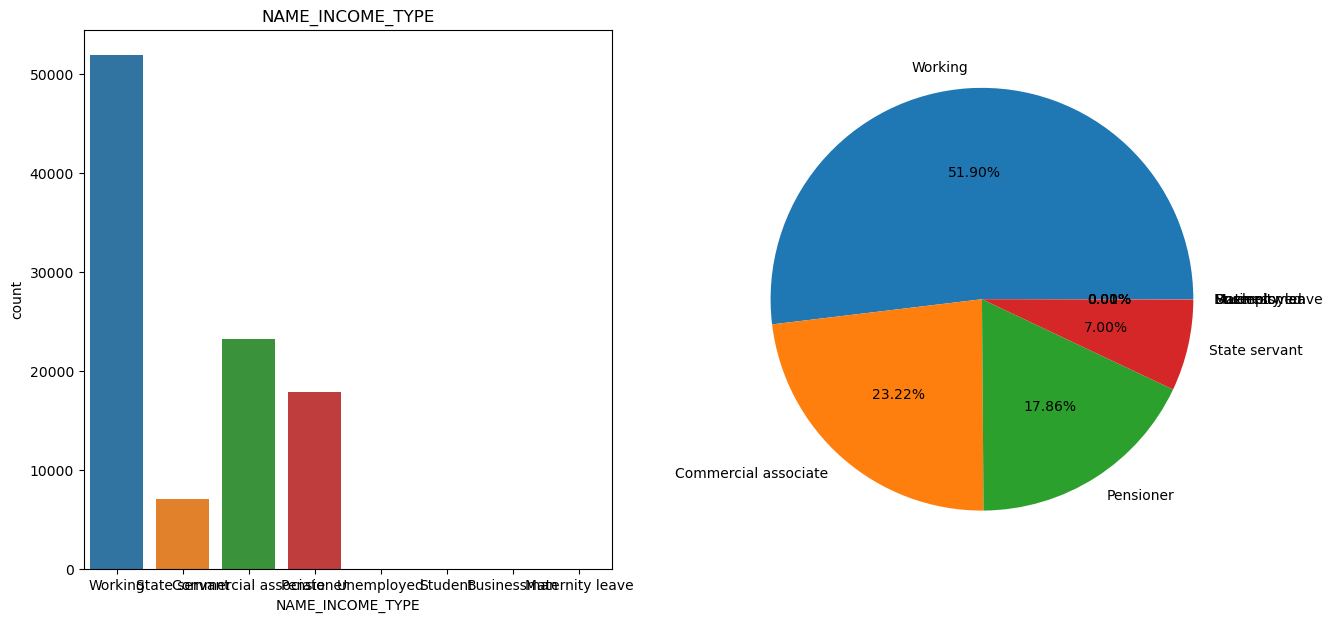

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('NAME_INCOME_TYPE')
percentage=df['NAME_INCOME_TYPE'].value_counts()
labels=list(df['NAME_INCOME_TYPE'].value_counts().index)
sns.countplot(x=df['NAME_INCOME_TYPE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### 51% of the people are working professional followed by commercial associate.


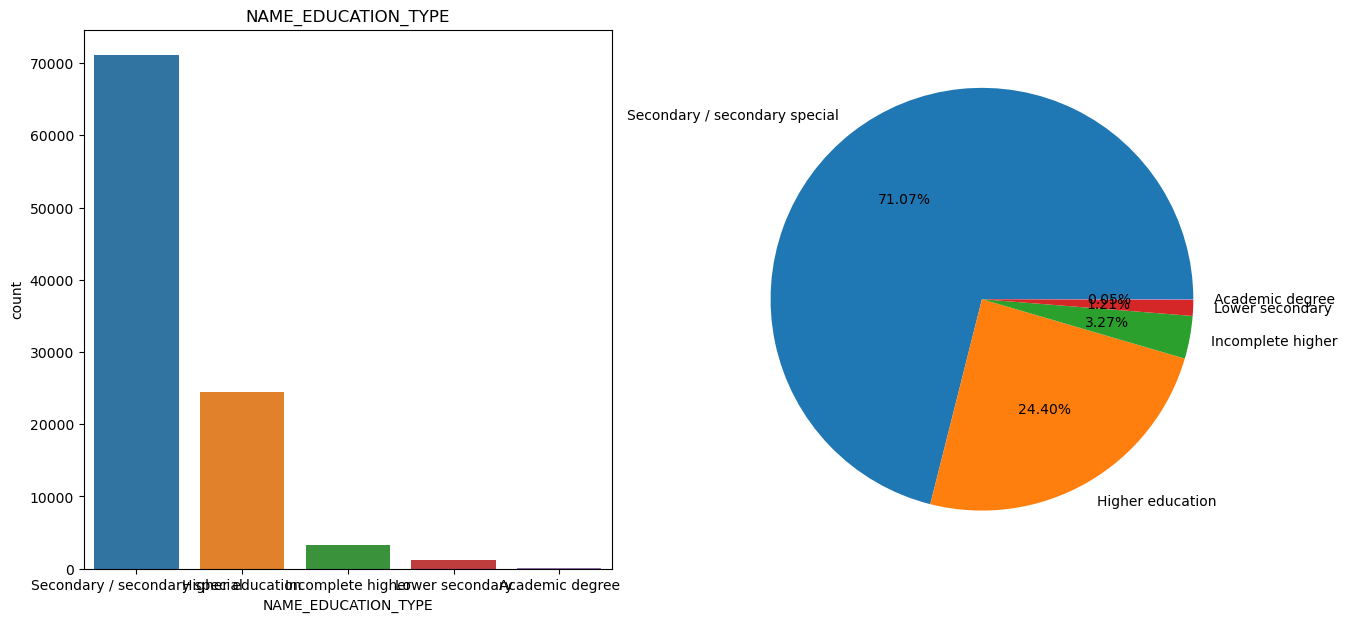

In [42]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('NAME_EDUCATION_TYPE')
percentage=df['NAME_EDUCATION_TYPE'].value_counts()
labels=list(df['NAME_EDUCATION_TYPE'].value_counts().index)
sns.countplot(x=df['NAME_EDUCATION_TYPE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### 71% of the have educational qualification of secondary and secondary special .


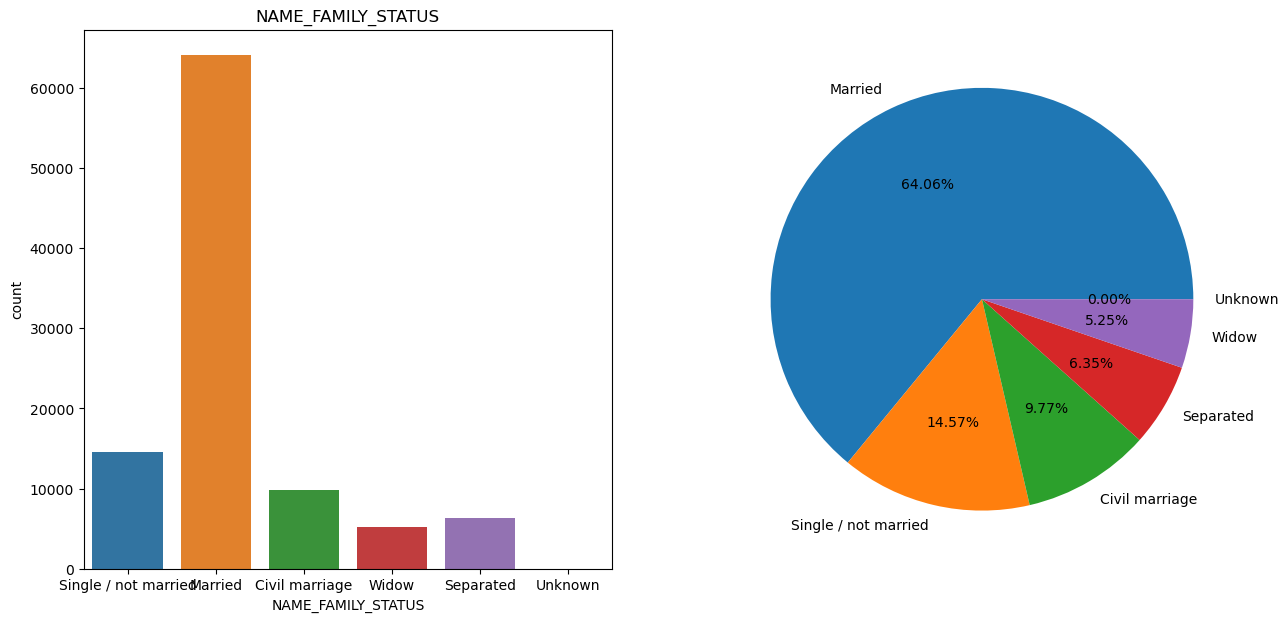

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('NAME_FAMILY_STATUS')
percentage=df['NAME_FAMILY_STATUS'].value_counts()
labels=list(df['NAME_FAMILY_STATUS'].value_counts().index)
sns.countplot(x=df['NAME_FAMILY_STATUS'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### Most of the clint in the bank are married which adds up to 61%  of the total followed by single people.


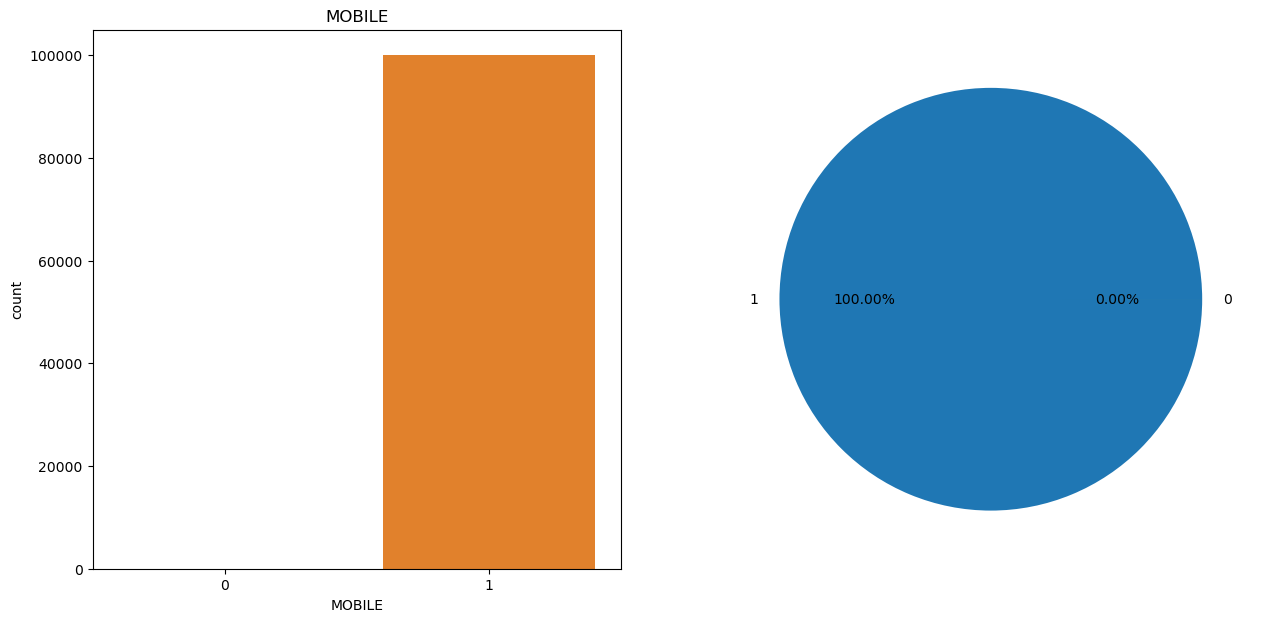

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('MOBILE')
percentage=df['MOBILE'].value_counts()
labels=list(df['MOBILE'].value_counts().index)
sns.countplot(x=df['MOBILE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-All the clients in the bank are having an  mobile phone .


In [44]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

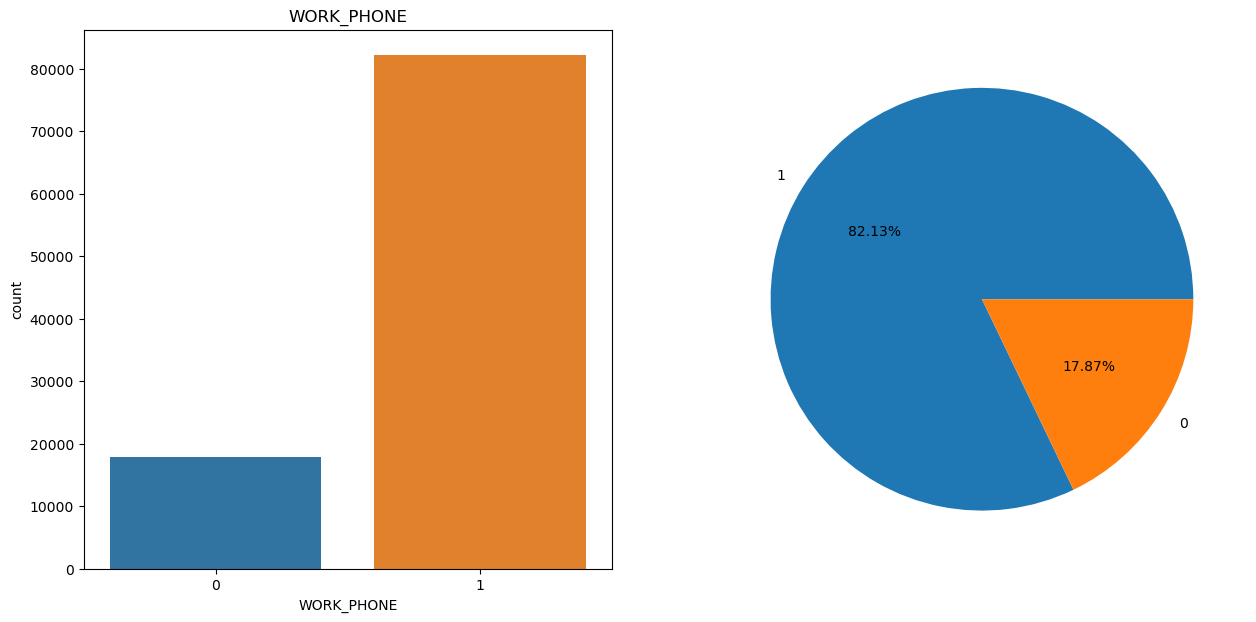

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('WORK_PHONE')
percentage=df['WORK_PHONE'].value_counts()
labels=list(df['WORK_PHONE'].value_counts().index)
sns.countplot(x=df['WORK_PHONE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-This shows that a large number of individuals or customers have provided phone numbers to work there.

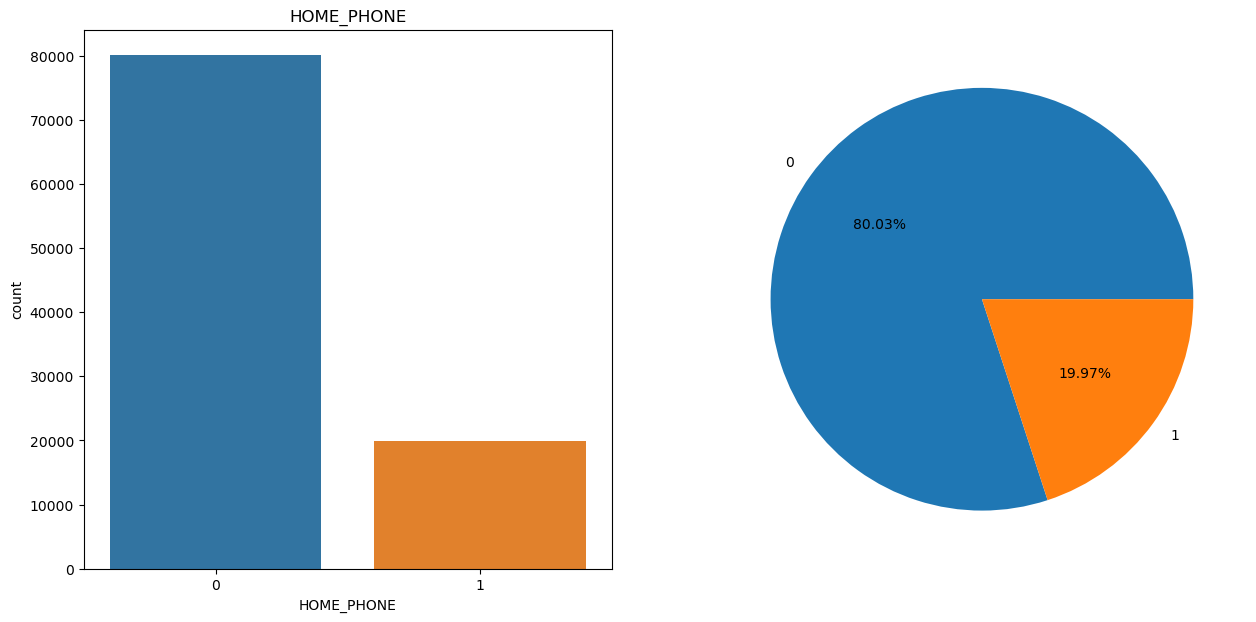

In [46]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('HOME_PHONE')
percentage=df['HOME_PHONE'].value_counts()
labels=list(df['HOME_PHONE'].value_counts().index)
sns.countplot(x=df['HOME_PHONE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

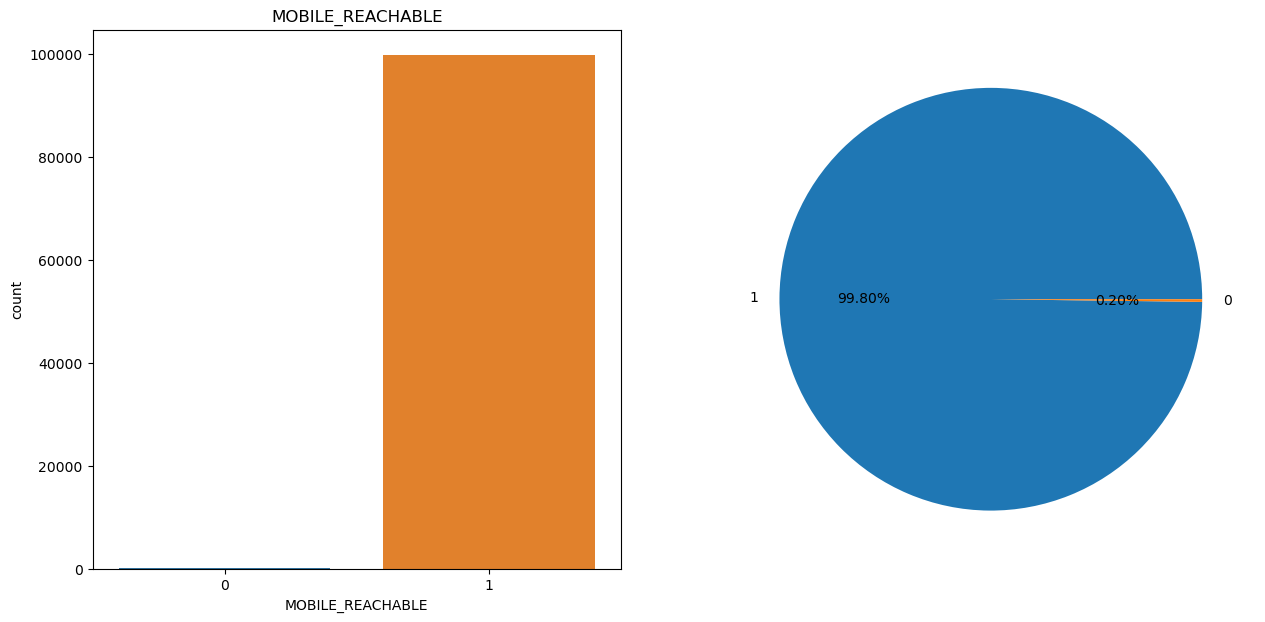

In [49]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('MOBILE_REACHABLE')
percentage=df['MOBILE_REACHABLE'].value_counts()
labels=list(df['MOBILE_REACHABLE'].value_counts().index)
sns.countplot(x=df['MOBILE_REACHABLE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

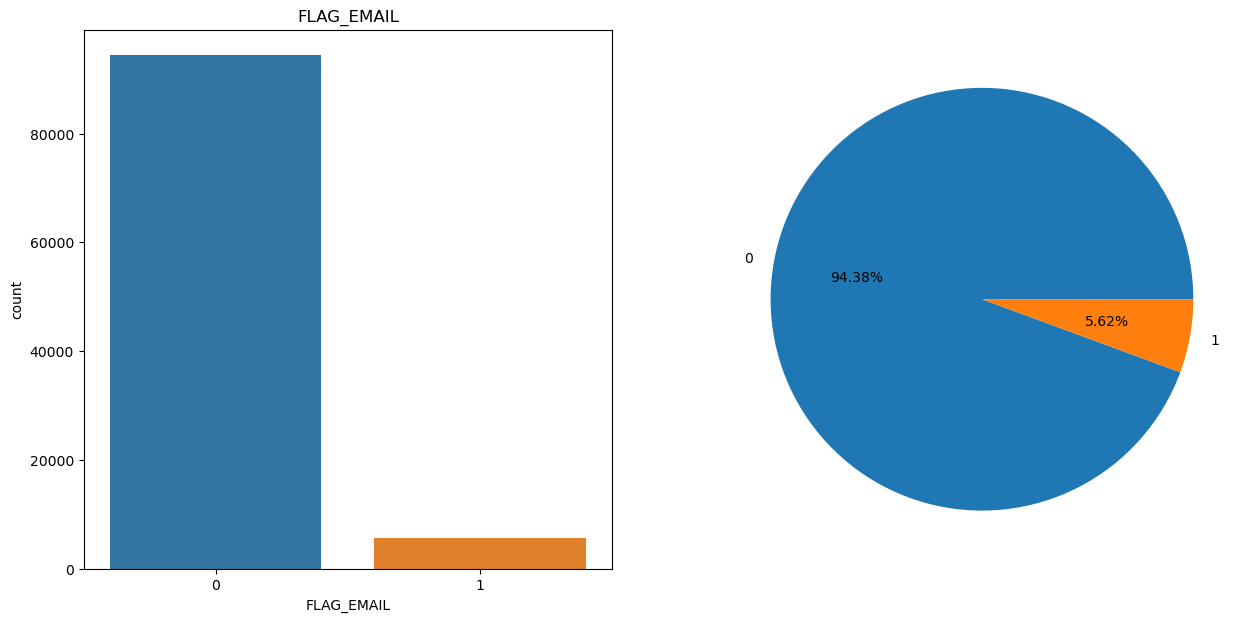

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('FLAG_EMAIL')
percentage=df['FLAG_EMAIL'].value_counts()
labels=list(df['FLAG_EMAIL'].value_counts().index)
sns.countplot(x=df['FLAG_EMAIL'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

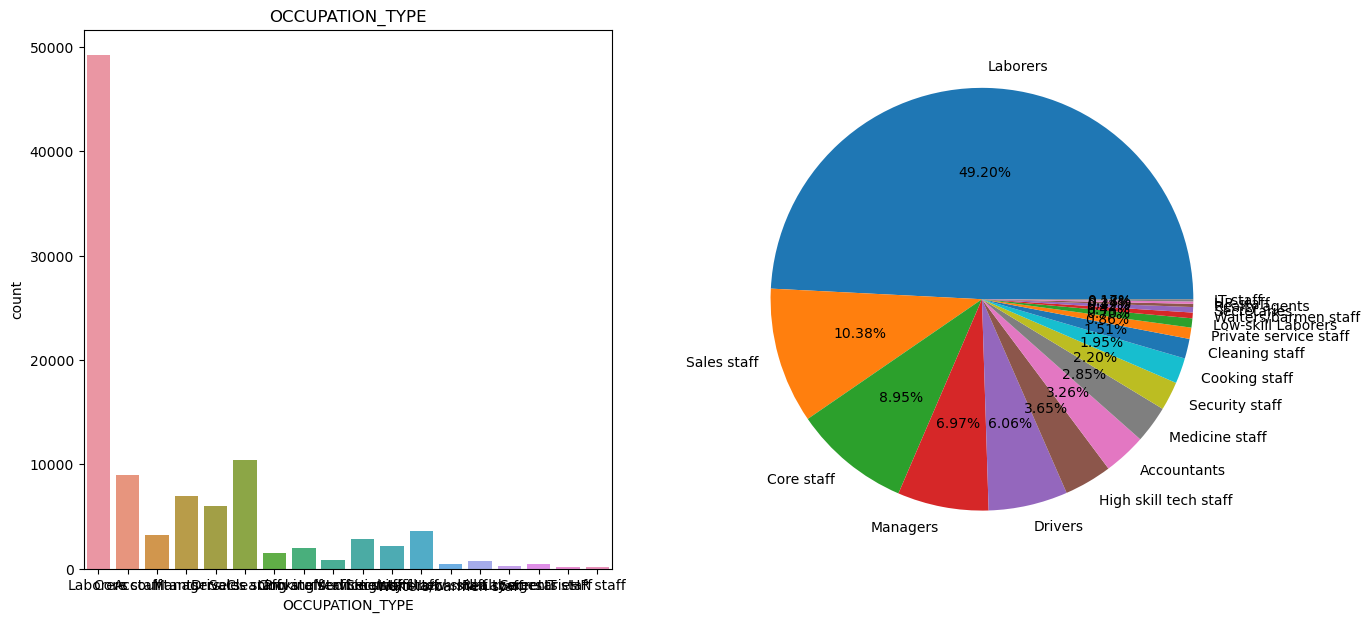

In [51]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('OCCUPATION_TYPE')
percentage=df['OCCUPATION_TYPE'].value_counts()
labels=list(df['OCCUPATION_TYPE'].value_counts().index)
sns.countplot(x=df['OCCUPATION_TYPE'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-Most of the client occupation is labours with 49% followed by sales staff.


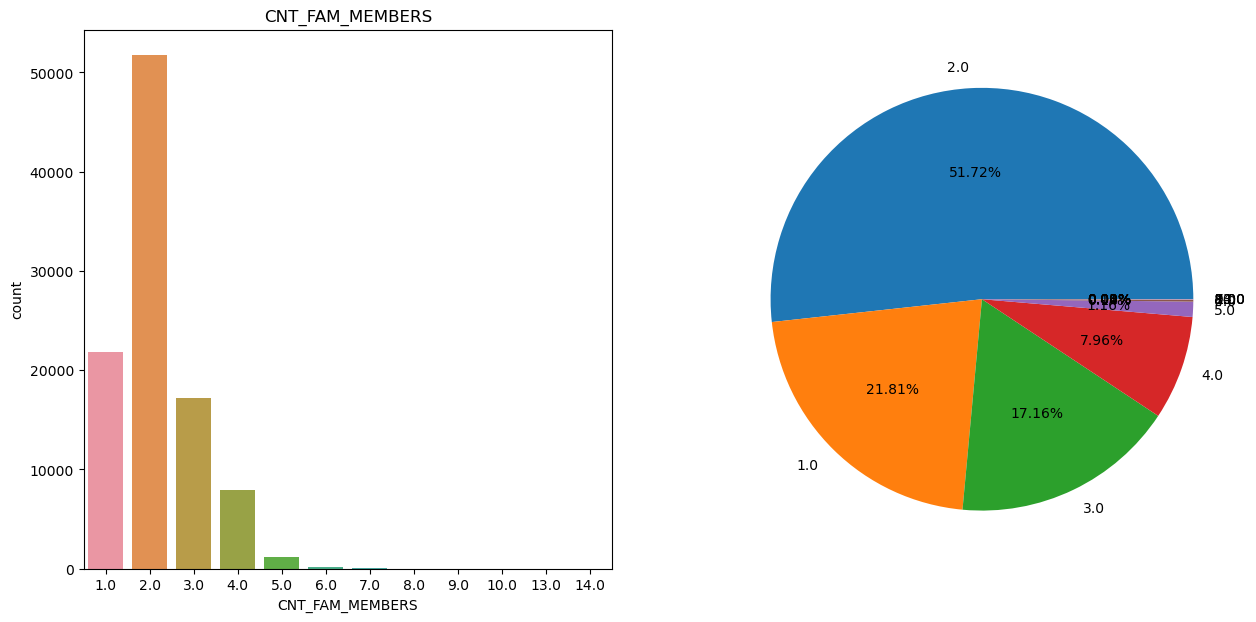

In [52]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('CNT_FAM_MEMBERS')
percentage=df['CNT_FAM_MEMBERS'].value_counts()
labels=list(df['CNT_FAM_MEMBERS'].value_counts().index)
sns.countplot(x=df['CNT_FAM_MEMBERS'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interepretation :-In around 51% of the dataset ‘s cases , the ‘CNT_FAM_MEMBERS’ column indicates a count of ‘2’ ,representation of instances  where families or individuals are recorded with a total of two member.


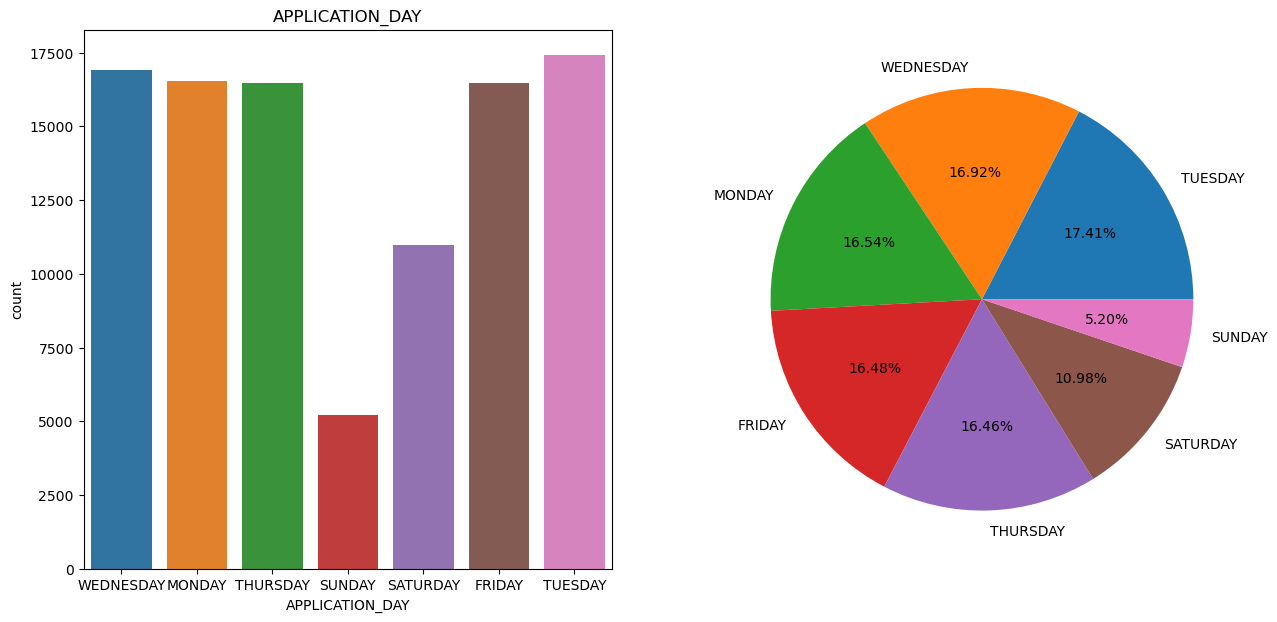

In [53]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('APPLICATION_DAY')
percentage=df['APPLICATION_DAY'].value_counts()
labels=list(df['APPLICATION_DAY'].value_counts().index)
sns.countplot(x=df['APPLICATION_DAY'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-About 17% of the dataset’s instances indicate Tuesday as the day when clients applied for the loan .


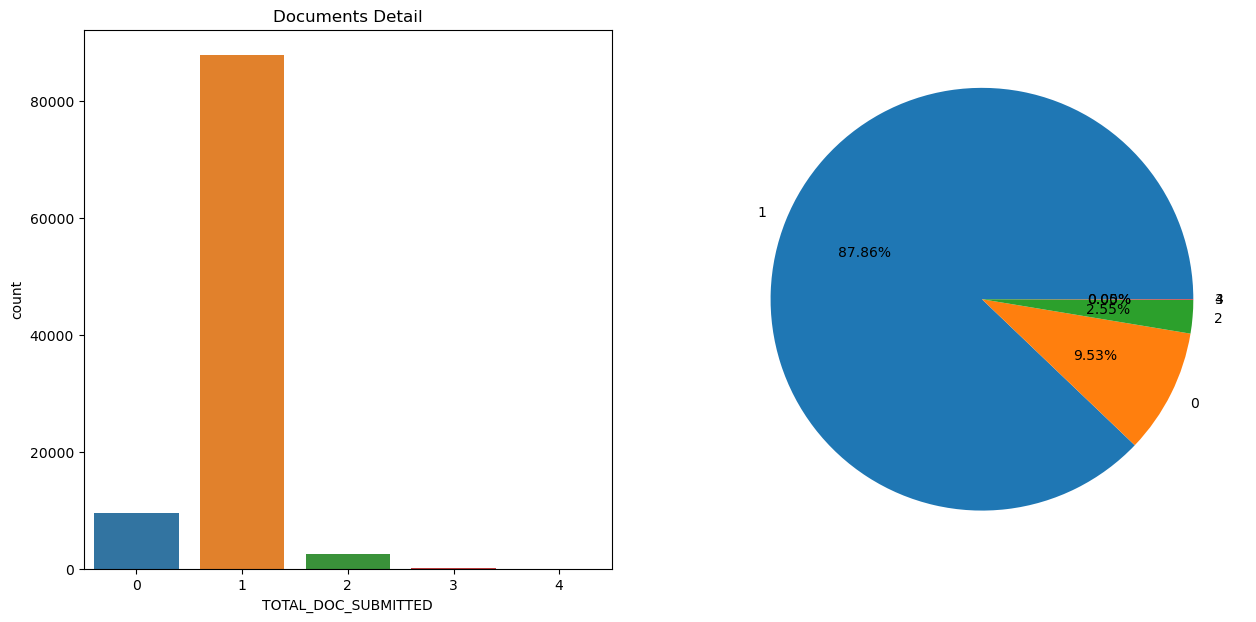

In [54]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Documents Detail')
percentage=df['TOTAL_DOC_SUBMITTED'].value_counts()
labels=list(df['TOTAL_DOC_SUBMITTED'].value_counts().index)
sns.countplot(x=df['TOTAL_DOC_SUBMITTED'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

### interpretation:-87% of the dataset’s entries or instances indicate the submission of at least one document.


In [47]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

## Univariate analysis of numerical columns

In [48]:
def info_data_numerical(col):
    print(f"The value of mean {col} is : {df[col].mean()}")
    print(f" the value of median {col} is : {df[col].median()}")
    print(f" the value of mode {col} is : {df[col].mode()[0]}")
    print(f" The standerd division {col} is : {df[col].std()}")
    print(f" The number of missing {col} is : {df[col].isnull().sum()}")
          


In [49]:
info_data_numerical('SK_ID_CURR')

The value of mean SK_ID_CURR is : 158006.05438163146
 the value of median SK_ID_CURR is : 157878.0
 the value of mode SK_ID_CURR is : 100002
 The standerd division SK_ID_CURR is : 33481.377239764726
 The number of missing SK_ID_CURR is : 0


In [50]:
info_data_numerical('AMT_INCOME_TOTAL')

The value of mean AMT_INCOME_TOTAL is : 169426.15805799174
 the value of median AMT_INCOME_TOTAL is : 144000.0
 the value of mode AMT_INCOME_TOTAL is : 135000.0
 The standerd division AMT_INCOME_TOTAL is : 383506.4612614468
 The number of missing AMT_INCOME_TOTAL is : 0


In [51]:
info_data_numerical('AMT_CREDIT')

The value of mean AMT_CREDIT is : 599010.8418252547
 the value of median AMT_CREDIT is : 513315.0
 the value of mode AMT_CREDIT is : 450000.0
 The standerd division AMT_CREDIT is : 402055.592829357
 The number of missing AMT_CREDIT is : 0


In [52]:
info_data_numerical('AMT_GOODS_PRICE')

The value of mean AMT_GOODS_PRICE is : 538353.4245734034
 the value of median AMT_GOODS_PRICE is : 450000.0
 the value of mode AMT_GOODS_PRICE is : 450000.0
 The standerd division AMT_GOODS_PRICE is : 369250.4201881516
 The number of missing AMT_GOODS_PRICE is : 0


In [53]:
info_data_numerical('DAYS_EMPLOYED')

The value of mean DAYS_EMPLOYED is : 63294.261577847334
 the value of median DAYS_EMPLOYED is : -1219.0
 the value of mode DAYS_EMPLOYED is : 365243
 The standerd division DAYS_EMPLOYED is : 140841.3161492932
 The number of missing DAYS_EMPLOYED is : 0


In [54]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

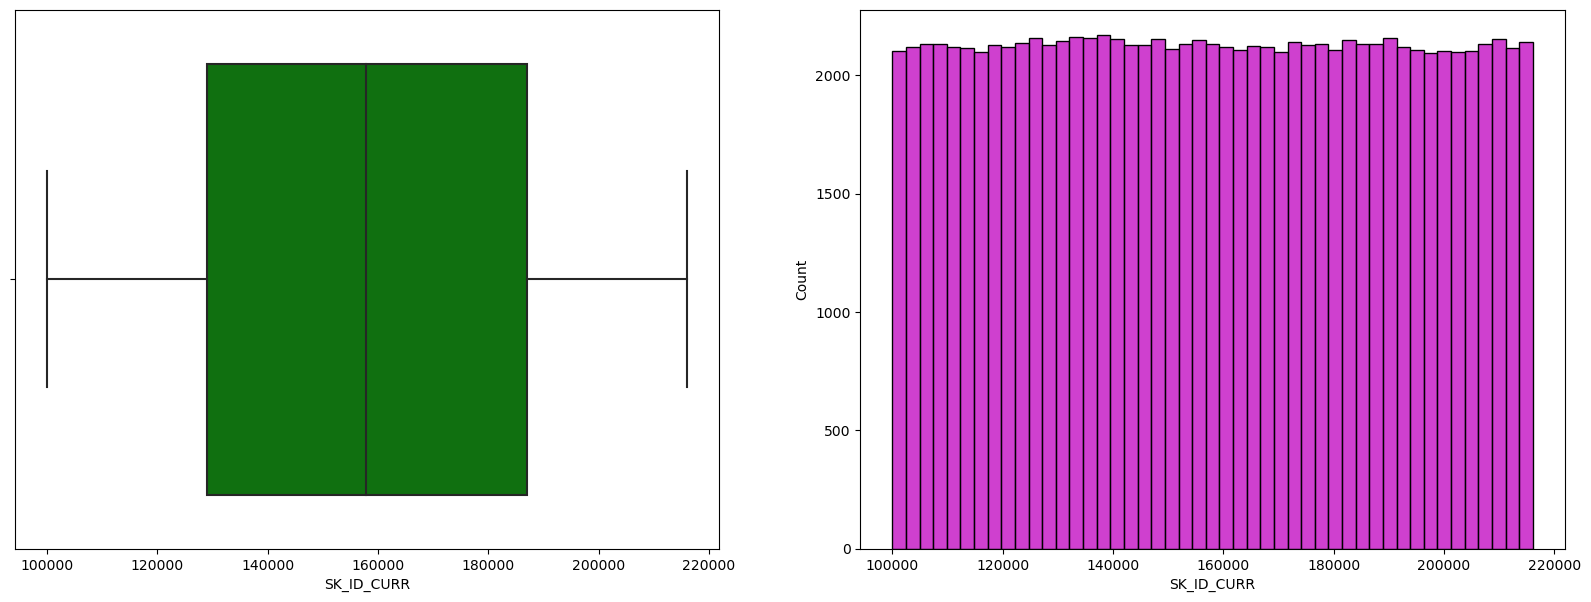

In [55]:
# Distribution of SK_ID_CURR
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["SK_ID_CURR"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["SK_ID_CURR"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

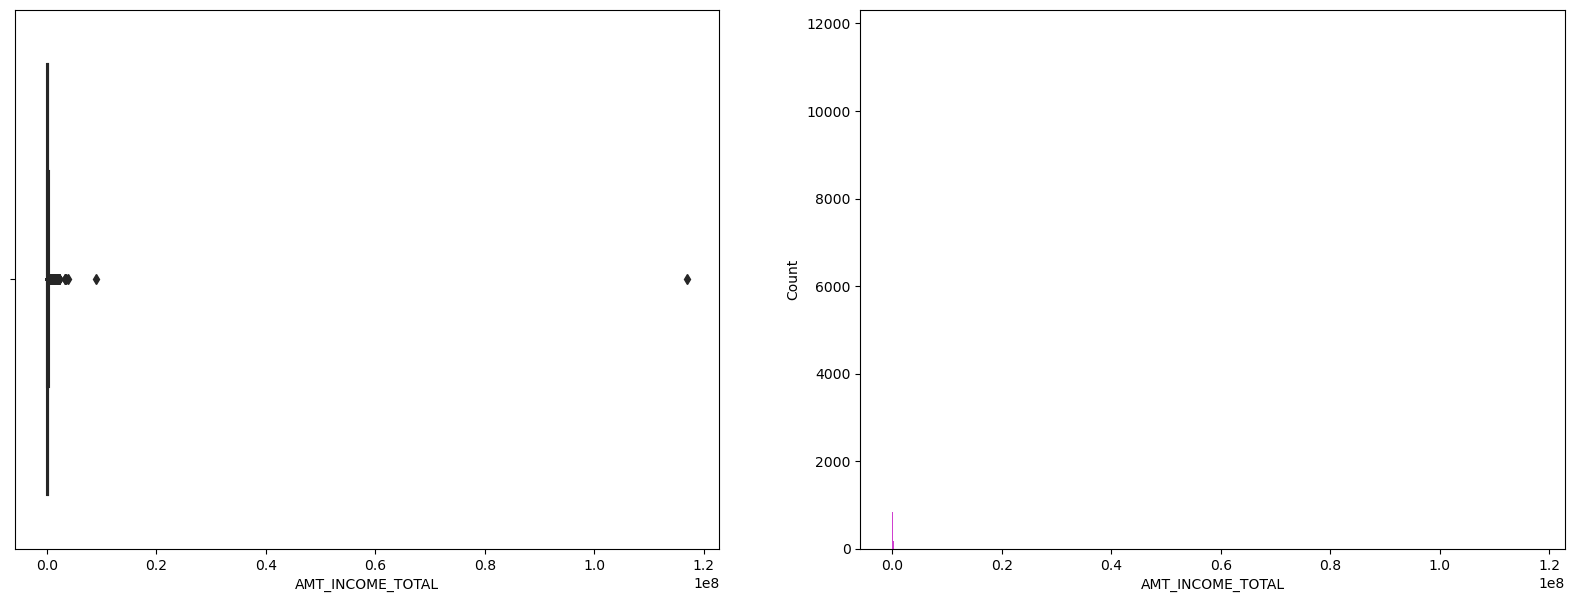

In [56]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [57]:
df['AMT_INCOME_TOTAL'].mean()

169426.15805799174

In [58]:
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 =  df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['AMT_INCOME_TOTAL'] < lower_bound) | (df['AMT_INCOME_TOTAL'] > upper_bound)]

# Print or further analyze the outliers
print("Outliers:")
print(outliers)

Outliers:
       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
7          100010       0         Cash loans      M   Y     Y             0   
22         100026       0         Cash loans      F   N     N             1   
33         100039       0         Cash loans      M   Y     N             1   
49         100056       0         Cash loans      M   Y     Y             0   
51         100059       0         Cash loans      M   Y     Y             1   
...           ...     ...                ...    ...  ..   ...           ...   
99821      215881       0         Cash loans      M   Y     Y             1   
99830      215892       0         Cash loans      M   N     Y             0   
99870      215942       0    Revolving loans      F   N     Y             0   
99879      215953       0         Cash loans      M   Y     Y             1   
99983      216074       0         Cash loans      F   N     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_

In [59]:
mean = int(df['AMT_INCOME_TOTAL'].mean())
x = df[df['AMT_INCOME_TOTAL'] >280000].index
for index in x:
    df.loc[index, 'AMT_INCOME_TOTAL'] = mean

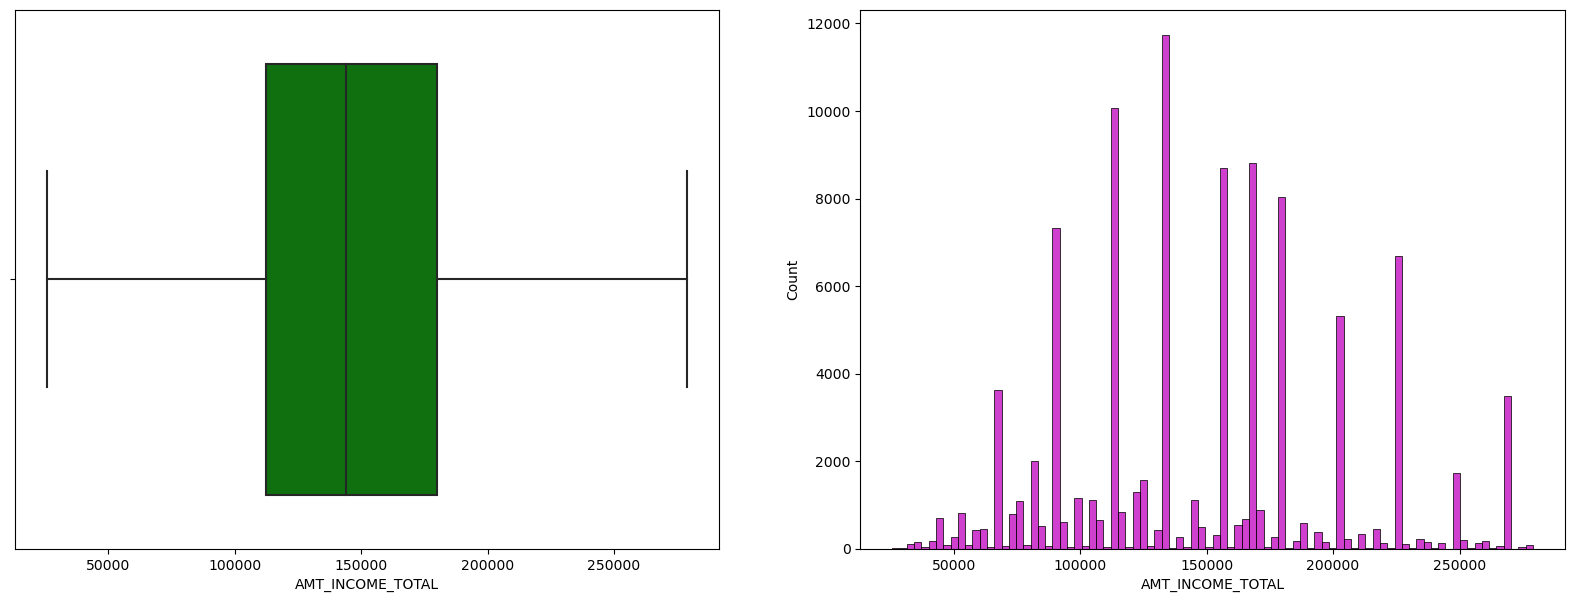

In [60]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [61]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

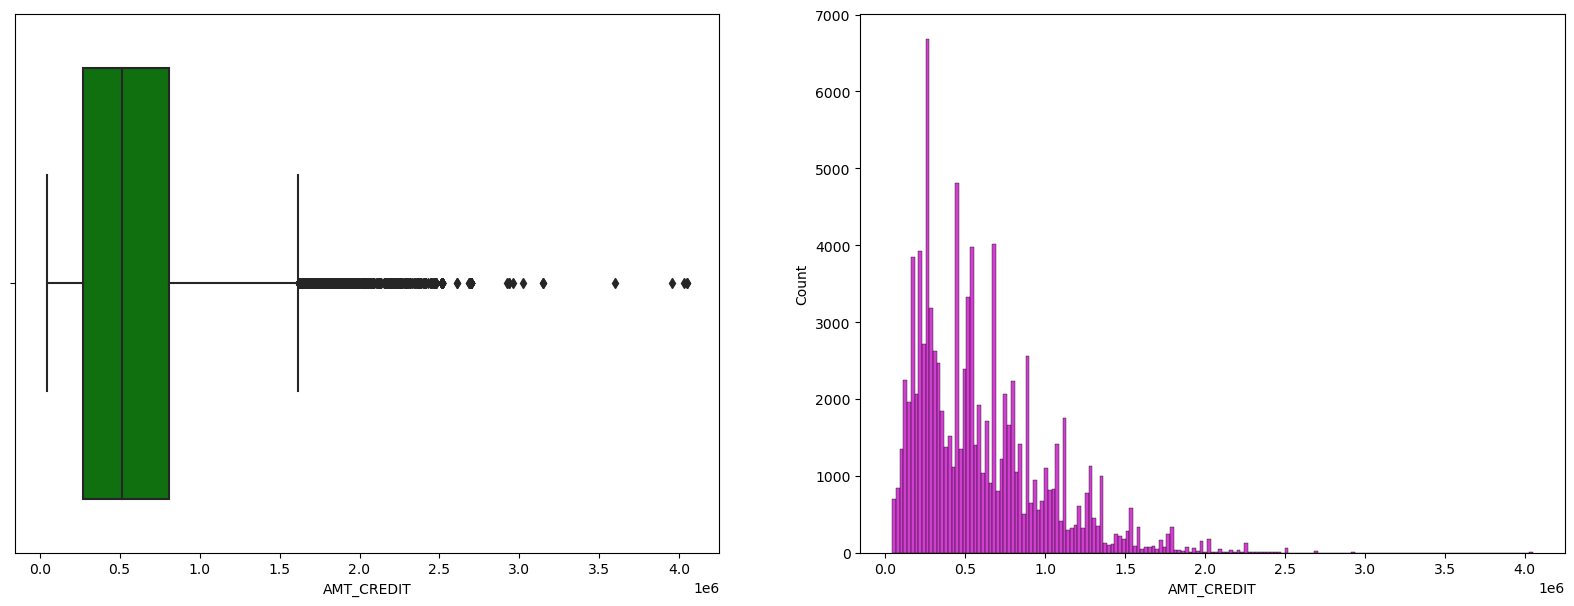

In [62]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [63]:
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 =  df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['AMT_CREDIT'] < lower_bound) | (df['AMT_CREDIT'] > upper_bound)]

# Print or further analyze the outliers
print("Outliers:")
print(outliers)

Outliers:
       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
60         100071       0         Cash loans      F   N     Y             0   
135        100157       0         Cash loans      M   N     Y             0   
189        100219       0         Cash loans      M   N     Y             1   
235        100273       1         Cash loans      F   N     Y             0   
314        100361       0         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99682      215725       0         Cash loans      F   Y     N             0   
99697      215743       0         Cash loans      F   N     Y             0   
99703      215749       0         Cash loans      F   Y     Y             2   
99926      216010       0         Cash loans      F   N     N             1   
99964      216054       0         Cash loans      F   Y     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_

In [64]:
mean = int(df['AMT_CREDIT'].mean())
x = df[df['AMT_CREDIT'] >500000].index
for index in x:
    df.loc[index, 'AMT_CREDIT'] = mean

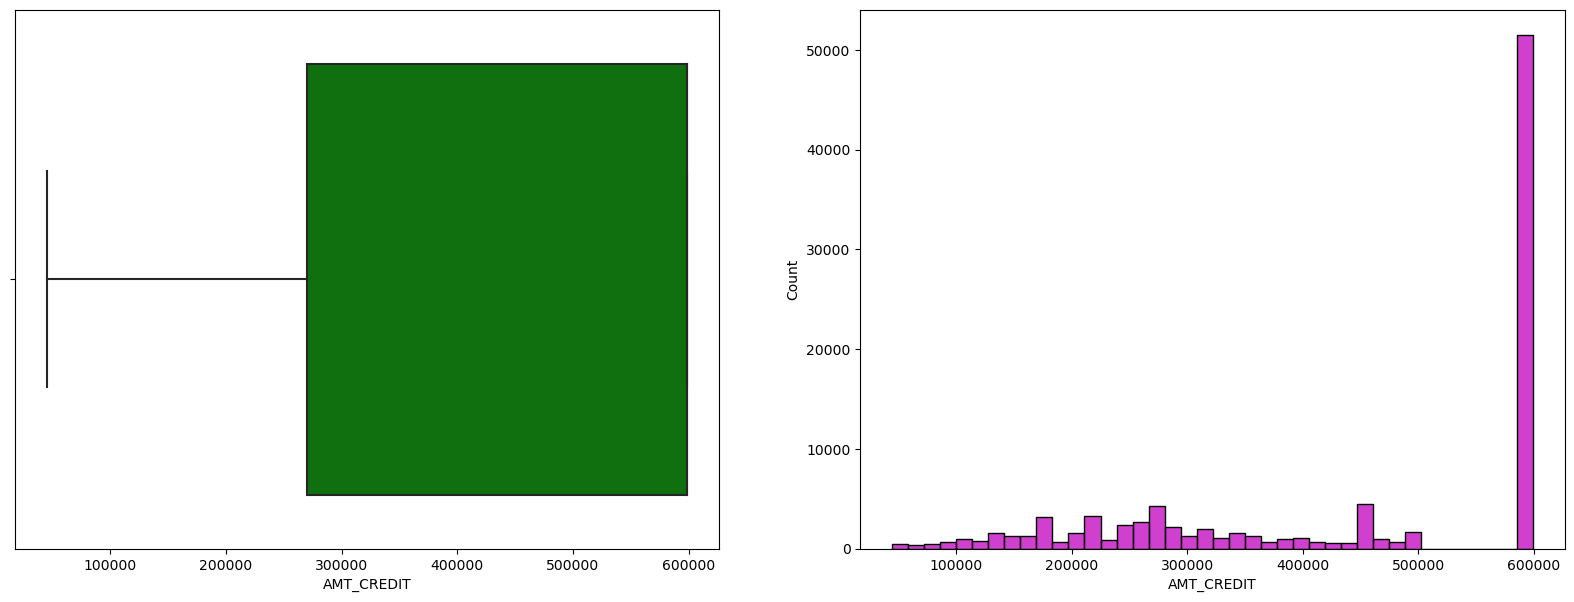

In [65]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

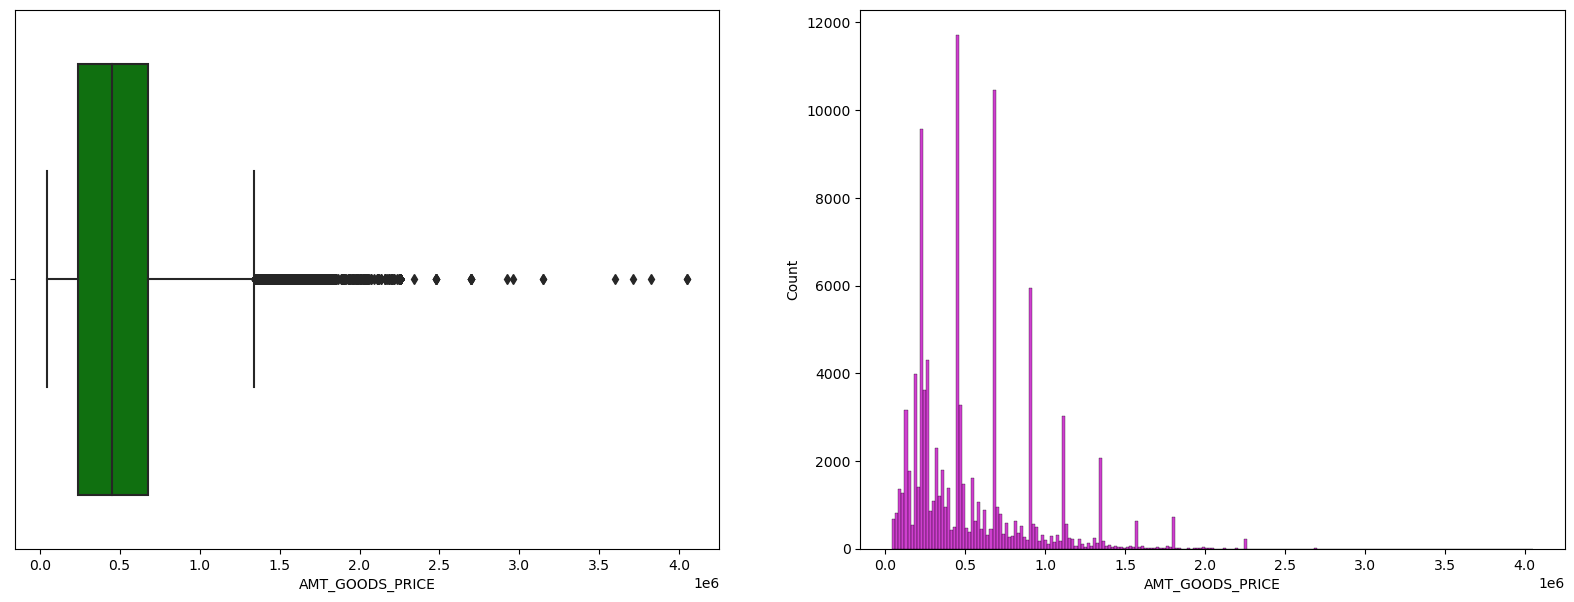

In [66]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [67]:
df['AMT_GOODS_PRICE'].mean()

538353.4245734034

In [68]:
bi variate analysis


SyntaxError: invalid syntax (3371558642.py, line 1)

## target and gender wise

In [ ]:
df.columns

In [ ]:
# target and gender
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x=df['TARGET'],hue=df['GENDER'])
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x=df['TARGET'],hue=df['TOTAL_DOC_SUBMITTED'])
plt.show()

In [ ]:
# target and gender
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x=df['NAME_CONTRACT_TYPE'],hue=df['TARGET'])
plt.show()

In [ ]:
# target and gender
fig,ax=plt.subplots(figsize=(8,4))
sns.countplot(x=df['TARGET'],hue=df['NAME_INCOME_TYPE'])
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['TARGET'],hue=df['OCCUPATION_TYPE'])
plt.show()

In [ ]:
df.columns

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['TARGET'],hue=df['House'])
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['TARGET'],hue=df['CNT_FAM_MEMBERS'])
plt.show()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=data2, ax=ax[0])
sns.histplot(x=data2['AMT_INCOME_TOTAL'],hue=data2['TARGET'],ax=ax[1])
plt.show()

In [ ]:
data2 =df[(df['AMT_INCOME_TOTAL'] >100000)]
data2
figsize = (10,3)
sns.boxplot(x =data2['AMT_INCOME_TOTAL'])
plt.title(f"boxplot with income")
plt.show()

In [ ]:
data2 =df[(df['AMT_INCOME_TOTAL'] >100000)]
data2
figsize = (10,3)
sns.boxplot(x =data2['AMT_INCOME_TOTAL'])
plt.title(f"boxplot with income")
plt.show()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=data2, ax=ax[0])
sns.histplot(x=data2['AMT_CREDIT'],hue=data2['TARGET'],ax=ax[1])
plt.show()

In [ ]:
df.columns

In [ ]:
df['AMT_INCOME_TOTAL'].unique()

In [ ]:
df1=df[(df['GENDER']=='F') &(df['TARGET']==0)& (df['House']=='Y') &(df['NAME_CONTRACT_TYPE']=='Cash loans')&(df['NAME_INCOME_TYPE']<='Working')&
        (df['TOTAL_DOC_SUBMITTED']==1)&(df['AMT_INCOME_TOTAL']>=150000)]

In [ ]:
df1

In [ ]:
fig,ax=plt.subplots(figsize=(5,4))
sns.histplot(x=df1['AMT_CREDIT'],hue=df1['AMT_CREDIT'])
plt.show()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('AMT_CREDIT')
percentage=df1['AMT_CREDIT'].value_counts()
labels=list(df1['AMT_CREDIT'].value_counts().index)
sns.countplot(x=df1['AMT_CREDIT'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2f%%")
plt.show()

## final interpretation